In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import ast

In [44]:
credits = pd.read_csv('./data/tmdb_5000_credits.csv')
movies = pd.read_csv('./data/tmdb_5000_movies.csv')
len(movies)
# Data source: https://www.kaggle.com/datasets/chaitanyasood1/tmdb-5000-movies

4803

In [45]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [46]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Modify Dataframe for this iteration

### Create missing values

In [47]:
missing_movies = {'budget': 109,
          'popularity': 189, 
           'revenue': 82, 
           'runtime': 65, 
           'vote_average': 135, 
           'vote_count': 283}

In [48]:
for key, value in missing_movies.items():
    nulls = len(movies[movies[key].isnull()])
    pos = random.sample(range(0, len(movies)), value-nulls)
    for x in pos:
        movies.loc[x, key] = np.nan


In [49]:
# movies[movies['title']=='Interstellar']

In [50]:
movies.loc[1881, 'vote_average'] = 7
movies.loc[65, 'vote_average'] = 4
movies.loc[329, 'vote_average'] = 5
movies.loc[95, 'vote_average'] = 2

In [51]:
movies['nominated_oscars'] = random.choices([0,1], k = len(movies))

In [52]:
movies['nominated_oscars'].describe()

count    4803.000000
mean        0.502603
std         0.500045
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: nominated_oscars, dtype: float64

In [53]:
def extract_genre(row):
    genres = ast.literal_eval(row)
    try:
        return genres[0]['name']
    except:
        None
movies['main_genre'] = movies['genres'].apply(extract_genre)    

In [54]:
credits.drop('title', axis = 1, inplace = True)

In [57]:
# credits.to_csv('./data/credits_iter_2.csv', index = False)
# movies.to_csv('./data/movies_iter_2.csv', index = False)

In [58]:
credits = pd.read_csv('./data/credits_iter_2.csv')
movies = pd.read_csv('./data/movies_iter_2.csv')

## Questions

### Question 1 - DS1-7
There are __________ columns in movie and __________ columns in credits dataset. 

In [59]:
print('There are {} columns in movies dataset and {} columns in credits dataset'.format(len(movies.columns), len(credits.columns)))

There are 22 columns in movies dataset and 3 columns in credits dataset


### Question 2 - DS1-7
There are total __________ missing values in movie and  __________ missing values in credit dataset

In [60]:
print('There are total {} missing values in movie and {} missing values in credit dataset'.format(movies.isnull().sum().sum(), credits.isnull().sum().sum()))

There are total 4830 missing values in movie and 0 missing values in credit dataset


### Question 3 - DS1-7

What would be the best way to impute missing values in the following columns : 

1- budget: __________ 

2- runtime: __________ 

Choose between mean, median, mode 
(DO NOT IMPUTE THE VALUES)

budget : 2.452591609149888
runtime : 0.6962850274395517


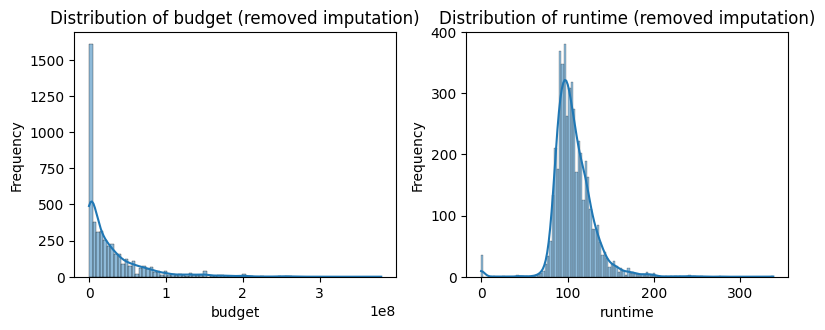

budget : median
runtime : median
budget : 2.4936529451416036
runtime : 0.7059235439686454


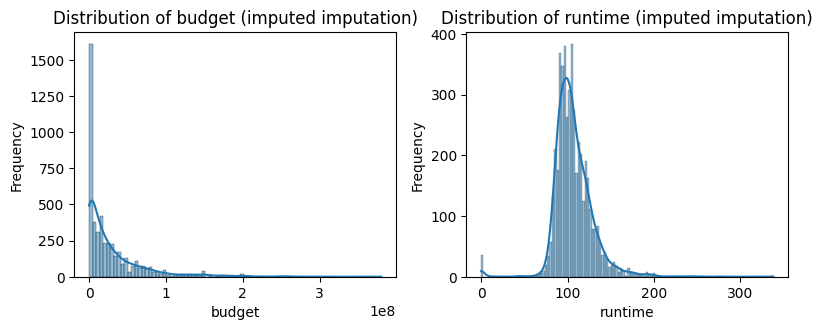

In [61]:
from scipy.stats import skew
from sklearn.impute import SimpleImputer
def plot_distribution_with_imputation(df, numerical_cols, strategy='removed'):
    # Copy the DataFrame to avoid modifying the original data
    df_copy = df.copy()

    # Plot the distribution of numerical columns
    plt.figure(figsize=(12, 6))
    for col in numerical_cols:
        print(f"{col} : {skew(df_copy[col].dropna())}")
        plt.subplot(2, 3, numerical_cols.index(col) + 1)
######################### Question 8 (step 1) #############################################
        #make relevant plot to analyse the distribution
        sns.histplot(df_copy[col], kde=True)
######################### Question 8 (step 1) #############################################
        plt.title(f'Distribution of {col} ({strategy} imputation)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
plot_distribution_with_imputation(movies, ['budget','runtime'], strategy='removed')


def impute_numerical_skew(df, numerical_cols):
    df_copy = df.copy()
    for col in numerical_cols:
####### Question 8 (step 2) ##############
          #fill the values for each column
        if skew(df_copy[col].dropna()) > 0:
            imputer = SimpleImputer(strategy='median')
            print(f"{col} : median")
        else:
            imputer = SimpleImputer(strategy='mean')
            print(f"{col} : mean")
        df_copy[col] = imputer.fit_transform(df_copy[[col]])
####### Question 8 (step 2) ##############
    return df_copy

missing_col = ['budget','runtime']
imputed_df = impute_numerical_skew(movies, missing_col)
# Visualize the distribution after imputation
plot_distribution_with_imputation(imputed_df, missing_col, strategy='imputed')

### Question 4 DS1-7
The analysis will continue by only using the records that do not have any missing values in the following columns: budget, popularity, revenue, runtime, vote_average, vote_count. 
The new data frame has ____ rows


In [62]:
movies = movies[(movies['budget'].notnull())&(movies['popularity'].notnull())&(movies['revenue'].notnull())&
        (movies['runtime'].notnull())&(movies['vote_average'].notnull())&(movies['vote_count'].notnull())].copy()

In [63]:
len(movies)

4022

### Question 5 - DS1-1
What is the `vote_average` for the 10th percentile?

In [78]:
q = movies.vote_average.quantile(0.1)
q

4.9

### Question 6 - DS1-3
Complete the following line of code in [a] and [b] to calculate the mean budget by genre:

movies.[a] ('main_genre')[b].mean()

### Question 7 DS1-3
Which is the genre that had the highest budget expenditure?

In [66]:
movies.groupby('main_genre')['budget'].mean().sort_values()

main_genre
Foreign            0.000000e+00
TV Movie           0.000000e+00
Documentary        2.217808e+06
Horror             1.148130e+07
Music              1.663660e+07
Drama              1.798632e+07
Comedy             1.862317e+07
Romance            1.956832e+07
Mystery            2.009909e+07
Crime              2.228299e+07
Thriller           2.427773e+07
History            2.577659e+07
Western            2.643040e+07
War                3.061842e+07
Family             3.997450e+07
Action             4.697780e+07
Science Fiction    4.892870e+07
Fantasy            5.305304e+07
Adventure          6.414648e+07
Animation          7.051838e+07
Name: budget, dtype: float64

In [67]:
print('Animation')

Animation


### Question 8 DS1-3
There are ______ movies that:
- Spent more than 500,000
- Its main genre is Animation
- Its runtime is above 120 minutes or below 110 minutes
- Its original language is abbreviated as 'fr' or 'es'

In [68]:
len(movies[(movies['budget']>500000) & (movies['main_genre']=='Animation')& ((movies['runtime']>120)|(movies['runtime']<110)) &
       (movies['original_language'].isin(['fr', 'es']))])

4

### Question 9 - DS1-2


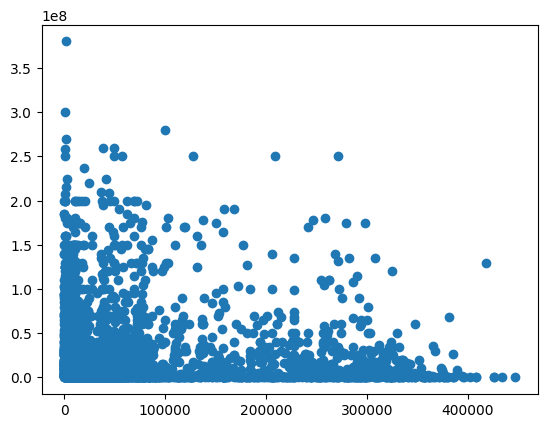

In [69]:
plt.scatter(movies.id, movies.budget)

### Question 10 - DS1-2
Which plot would you use to study the relationship between budget and revenue?
- scatter plot
- boxplot
- pie chart
- histogram

### Question 11 - Fill in the blanks - DS1-5
Combine the movie and credits datasets based on a shared attribute. Fill in the missing value for [a], [b], [c] 

`combined_df = movies.[a](credits,left_on=[b],right_on=[c],how='left')`

Below you can find a description of each dataset columns. 
***The Credit dataset contains the following features:-***

**movie_id** - A unique identifier for each movie.

**cast** - The name of lead and supporting actors.

**crew** - The name of Director, Editor, Composer, Writer etc.


***The Movie dataset has the following features:-***

**budget** - The budget in which the movie was made.

**genre** - The genre of the movie, Action, Comedy ,Thriller etc.

**homepage** - A link to the homepage of the movie.

**id** - This is infact the movie_id as in the first dataset.

**keywords** - The keywords or tags related to the movie.
**original_language** - The language in which the movie was made.

**original_title** - The title of the movie before translation or adaptation.

**overview** - A brief description of the movie.

**popularity** - A numeric quantity specifying the movie popularity.

**production_companies** - The production house of the movie.

**production_countries** - The country in which it was produced.

**release_date** - The date on which it was released.

**revenue** - The worldwide revenue generated by the movie.

**runtime** - The running time of the movie in minutes.

**status** - "Released" or "Rumored".

**tagline** - Movie's tagline.

**title** - Title of the movie.

**vote_average** - average ratings the movie recieved.

**vote_count** - the count of votes recieved.

In [70]:
combined_df = movies.merge(credits, left_on='id', right_on='movie_id', how='left')

### Question 12 - DS1-7
Find the total number of columns after combining dataframe and by removing redundant columns. 

In [71]:
combined_df.drop(columns = ['movie_id'], axis=1, inplace=True)
print(len(combined_df.columns))

24


In [72]:
#Question 4 
#????????

### Question 13  - DS1-4

Calculate the weighted rating (wr) for the movie

WeightedRating(WR)=[(v.R)/(v+m)] + [(m.C)/(v+m)]

where,
v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report

For calculation of m, we will use 85th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 85% of the movies in the list.

List the five movies with the highest WR. 

In [73]:
#C is the mean vote across the whole report
C= combined_df['vote_average'].mean()
#We will use 90th percentile as our cutoff.
#In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.
m= combined_df['vote_count'].quantile(0.85)

#weighted_rating
def weighted_rating(x, m=m, C=C):
    # v is the number of votes for the movie
    v = x['vote_count']
    #R is the average rating of the movie;
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

combined_df['score'] = combined_df.apply(weighted_rating, axis=1)
sorted_df = combined_df.sort_values('score', ascending=False)
sorted_df[['title', 'score']].head(5)

,title,score
551,Fight Club,8.035969
2693,Pulp Fiction,8.009158
2781,The Godfather,7.988504
79,Inception,7.929155
1664,The Empire Strikes Back,7.823274


In [79]:
', '.join(sorted_df[['title']].head(5).title.values)

'Fight Club, Pulp Fiction, The Godfather, Inception, The Empire Strikes Back'

### Question 14 - DS1-3
Create the correlation matrix of the dataset and select the appropiate option: 

- Score is positive and highly correlated with budget
- We should not be studying the correlation between id and the rest of the movies attributes
- It seems promising to increase the budget in order to increase the score

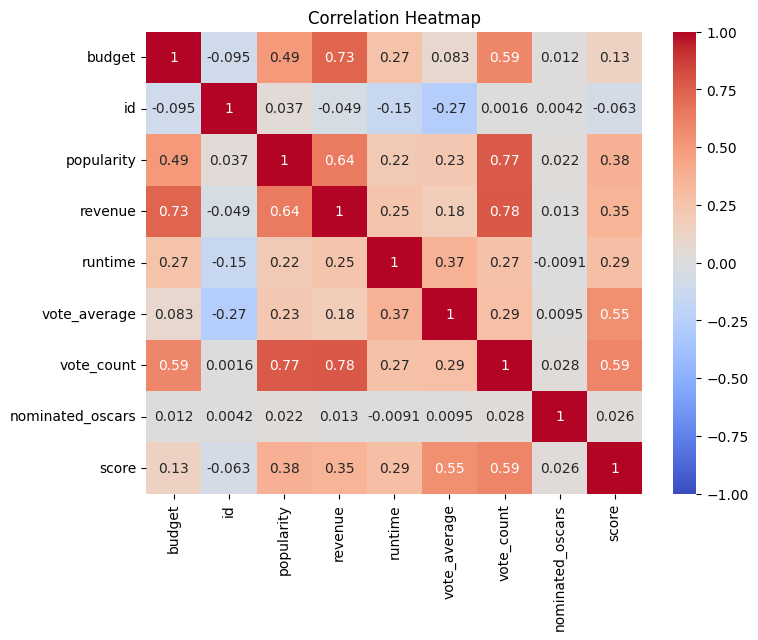

In [74]:
def create_correlation_matrix(test_df):
  correlation_matrix = test_df.corr()
  return correlation_matrix

temp_df = combined_df.select_dtypes(include=['number'])
correlation_matrix = create_correlation_matrix(temp_df)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Question 15 - DS1-5
What was the budget (integer) of the film with a crew of 151

In [75]:
import ast
def extract_number_crew(row):
    return len(ast.literal_eval(row))

In [76]:
combined_df['crew_size'] = combined_df['crew'].apply(extract_number_crew)

In [81]:
combined_df[combined_df['crew_size'] == 151]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,nominated_oscars,main_genre,cast,crew,score,crew_size
337,85000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.wbshop.com/product/code/1000040993.do,9884,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 1812...",en,Collateral Damage,Firefighter Gordon Brewer is plunged into the ...,18.827753,"[{""name"": ""David Foster Productions"", ""id"": 49...",...,What would you do if you lost everything?,Collateral Damage,5.5,427.0,0,Action,"[{""cast_id"": 14, ""character"": ""Gordy Brewer"", ...","[{""credit_id"": ""52fe4540c3a36847f80c3c09"", ""de...",5.935803,151


### Question 16 - DS1-8
Which of the following file formats can be used to save the combined_df
- png
- tiff
- csv
- xlsx
- doc